### Objective

Develop a Signature Varification model that can accurately differentiate "Real" and "Forged" signatures. The basics of this model is not just a simple classification problem but handling the complexity of subtle variations in genuine signature.

Unlike traditional classification problems (where each class has well-defined patterns), this problem requires handling unpredictable improper inputs that can take any shape.

#### Dataset Specifications
Proper Signatures: A set of genuine human signatures with natural variations in writing styles, pressure, slant, and stroke thickness.

Improper Signatures (Invalid Inputs): A diverse set of random scribbles, geometric shapes, fake strokes, numbers, doodles, and non-Latin characters.

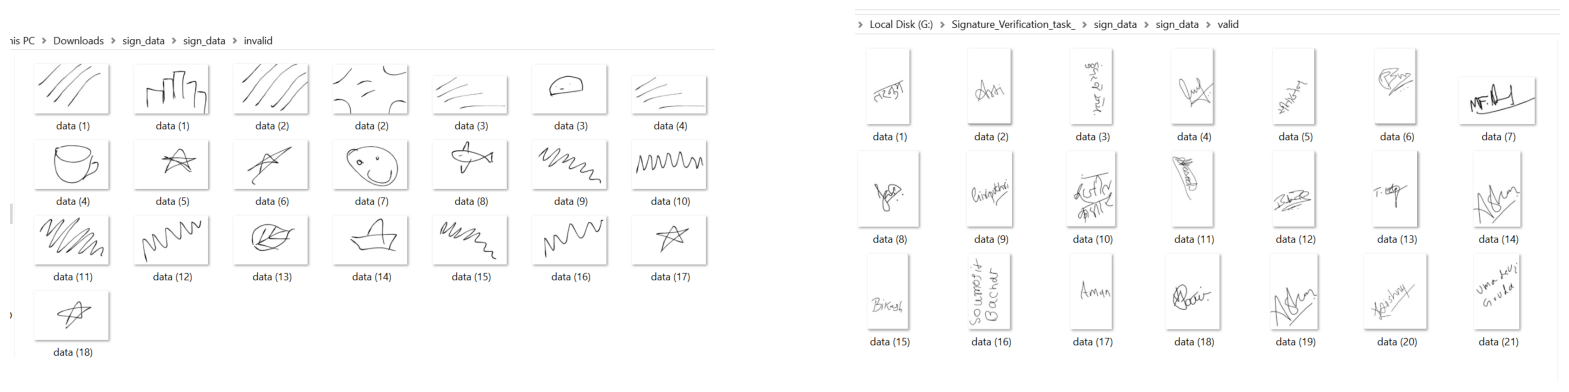

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
img1 = Image.open("Screenshot (270).png")
img2 = Image.open("Screenshot (272).png")

plt.figure(figsize=(20, 15))  
plt.subplot(1, 2, 1) 
plt.imshow(img1)
plt.axis("off")  

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis("off")  

plt.show()

### My Approach:

#### For Signature Verification Task, I would be using OpenCv module for image processing & feature extraction and Convolution Neural Netwrok(CNN) of Deep Learning for Classifiaction model.

### Steps Followed

### 1. Install and import necessary Libraries

In [9]:
pip install opencv-python tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import cv2

import warnings
warnings.filterwarnings('ignore')

In [11]:
import os

### 2. Load and Preprocess the data

In [13]:
import os

dataset_path = "G:\\Signature_Verification_task_\\sign_data\\sign_data"

# Check folder structure
for folder in os.listdir(dataset_path):
    print(f"Folder: {folder}")
    print(os.listdir(os.path.join(dataset_path, folder)))  

Folder: invalid
['data (1).jpeg', 'data (1).png', 'data (10).png', 'data (11).png', 'data (12).png', 'data (13).png', 'data (14).png', 'data (15).png', 'data (16).png', 'data (17).png', 'data (18).png', 'data (2).jpeg', 'data (2).png', 'data (3).jpeg', 'data (3).png', 'data (4).jpeg', 'data (4).png', 'data (5).png', 'data (6).png', 'data (7).png', 'data (8).png', 'data (9).png']
Folder: valid
['data (1).jpg', 'data (10).jpg', 'data (11).jpg', 'data (12).jpg', 'data (13).jpg', 'data (14).jpg', 'data (15).jpg', 'data (16).jpg', 'data (17).jpg', 'data (18).jpg', 'data (19).jpg', 'data (2).jpg', 'data (20).jpg', 'data (21).jpg', 'data (3).jpg', 'data (4).jpg', 'data (5).jpg', 'data (6).jpg', 'data (7).jpg', 'data (8).jpg', 'data (9).jpg']


### Function to load data and Image Processing

In [15]:
def load_images(folder, label, img_size=(217, 217)):
    #initializing empthy list
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        img = cv2.resize(img, img_size) 

        
        img = img / 255.0  # Normalization of pixel of datas.(Grayscale intensity range (0(black)-255(white)) so that it can be in the range of 0 & 1.
        images.append(img)
        labels.append(label)  # 1 for Valid & 0 for Invalid
    
    return np.array(images), np.array(labels)

In [16]:
valid_images, valid_labels = load_images(r'G:\Signature_Verification_task_\sign_data\sign_data\valid', label=1)
invalid_images, invalid_labels = load_images(r'G:\Signature_Verification_task_\sign_data\sign_data\invalid', label=0)

# Combine the data

X = np.concatenate((valid_images, invalid_images), axis=0)
y = np.concatenate((valid_labels, invalid_labels), axis=0)
y=y.reshape(-1,1)

In [17]:
print(X.shape)
print(y.shape)   

(43, 217, 217)
(43, 1)


### Data Preprocessing

### Reshaping the DataSet

Here, I am reshaping the dataset X because, there is need to include a channel dimension.

In [21]:
X=X.reshape(-1,217,217,1)

### Train-Test-split

In [23]:
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

print("Training data shape:",X_train.shape)
print("Testing data shape:",X_test.shape)
print("Training Label y_train:",y_train.shape)
print("Testing Label y_test:",y_test.shape)


Training data shape: (30, 217, 217, 1)
Testing data shape: (13, 217, 217, 1)
Training Label y_train: (30, 1)
Testing Label y_test: (13, 1)


### Data Augmentation & Normalization

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,        
    width_shift_range=0.2,    
    height_shift_range=0.2,   
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=False,    
    fill_mode='nearest'       
)

# Fit generator on training data
datagen.fit(X_train)

### 3. CNN Model Building

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(217,217,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(217, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 215, 215, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 107, 107, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 105, 105, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 52, 52, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 217)                 │      17,360,217 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             218 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,453,107 (66.58 MB)

 Trainable params: 17,453,107 (66.58 MB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [30]:
batch_size =32
epochs = 25 
model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), validation_data=(X_test, y_test),epochs=epochs)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4667 - loss: 0.6986 - val_accuracy: 0.3846 - val_loss: 3.7228
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5333 - loss: 2.7390 - val_accuracy: 0.6154 - val_loss: 0.6678
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4667 - loss: 0.6913 - val_accuracy: 0.6154 - val_loss: 0.6789
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4667 - loss: 0.8228 - val_accuracy: 0.6154 - val_loss: 0.6577
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4667 - loss: 0.7281 - val_accuracy: 0.6154 - val_loss: 0.6668
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4667 - loss: 0.7063 - val_accuracy: 0.3846 - val_loss: 0.6922
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5333 - loss: 0.6914 - val_accuracy: 0.3846 - val_loss: 0.7083
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5333 - loss: 0.6911 - val_accuracy: 0.3846 - val_loss: 0.7066
Epoch 9/25
1/1 ━

### 4. Model Evaluation & Visualization

In [32]:
X_test = X_test.reshape(-1,217,217,1)  # Add channel dimension

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)  
y_pred_class = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values (0 or 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


In [34]:
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.85
Precision: 1.00
Recall: 0.60
F1-score: 0.75


In [35]:
# I also need to check FP and FN. so i need to visualize confusion matrix.

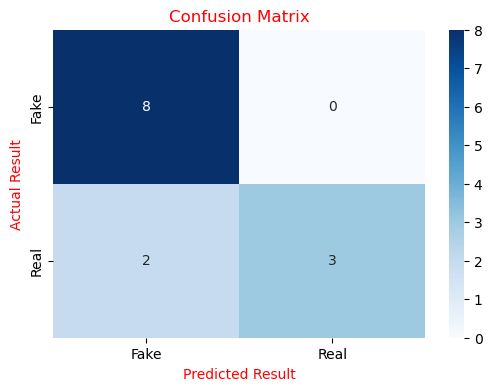

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",xticklabels=['Fake', 'Real'],yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Result',color='red')
plt.ylabel('Actual Result',color='red')
plt.title('Confusion Matrix',color='red')
plt.show()

In [37]:
FP = np.where((y_test == 0) & (y_pred == 1))[0]  # False Positives
FN = np.where((y_test == 1) & (y_pred == 0))[0]  # False Negatives

# Show some misclassified examples
print(f"False Positives (Predicted 1, Actual 0): {len(FP)}")
print(f"False Negatives (Predicted 0, Actual 1): {len(FN)}")

False Positives (Predicted 1, Actual 0): 0
False Negatives (Predicted 0, Actual 1): 0


### Finding the best threshold

In [39]:
import numpy as np

# Compute F1-score for different thresholds
thresholds = np.arange(0.1, 0.9, 0.05)

y_probs = model.predict(X_test).ravel()
f1_scores = [f1_score(y_test, (y_probs > t).astype("int32")) for t in thresholds]

# Find the threshold with the best F1-score
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold for classification: {best_threshold:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Best threshold for classification: 0.25


### "Best threshold for classification: 0.45"


### Save the model

In [42]:
from tensorflow.keras.models import load_model

model_file = r"G:\Signature_Verification_task_"
os.makedirs(model_file, exist_ok=True)

# Save the model
model_path = os.path.join(model_file, "signature_verification_model.h5")
model.save(model_path)


### Implementation